<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.2.3 
## Statistical Inference

### Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

The data was originally published by Harrison, D. and Rubinfeld, D.L. Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

Dataset Naming

The name for this dataset is simply boston. It has two prototasks: nox, in which the nitrous oxide level is to be predicted; and price, in which the median value of a home is to be predicted

Miscellaneous Details

-Origin
The origin of the boston housing data is Natural.

-Usage
This dataset may be used for Assessment.

-Number of Cases
The dataset contains a total of 506 cases.

-Order
The order of the cases is mysterious.

-Variables

There are 14 attributes in each case of the dataset. They are:

    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per 10000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in 1000

### Libraries

In [37]:
import pandas as pd
import numpy as np
import math

from scipy import stats
from matplotlib import pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize': (15, 10)})

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

%matplotlib inline

In [38]:
# Read CSV
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv("housing.data", header=None, names=names, delim_whitespace=True)

In [39]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [40]:
# AGE
Age =data.AGE



#### 1. Find the mean, standard deviation, and the standard error of the mean for variable `AGE`

Hint: The standard error of the mean (SEM) can be expressed as:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f9dac77577c2717cbb973388e4d6563915705742)

In [41]:
# ANSWER
AGE_mean=Age.mean()

In [42]:
Age.describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

In [43]:
stats.sem(Age)

1.2513695252583041

#### 2. Cenral Limit Theoram

Recall that the central limit theorem dictates that the distribution of sample means (calculated across different random samples from our overall population) will be normally distributed.

We will depend on the Central Limit Theorem again and again in order to do normal probability calculations when we use sample means to draw conclusions about a population mean. We now know that we can do this even if the population distribution is not normal.

##### 2.A Find the sample mean, sample standard deviation, and the sample standard error of the mean for variable `AGE` Using CLT

In [44]:
Age.describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

In [45]:
def calculate_sample_mean(df, column_name, N=10, sample_size=5):
    '''
    df: DataFrame
    column_name: String, column_name
    N: Number of samples
    sample_size: Size of sample for each sample
    '''
    sample_mean_list = []

    for i in range(N):
        df_sample = df.sample(n=sample_size)
        sample_mean = df_sample[column_name].mean()
        sample_mean_list.append(sample_mean)
    
    return sample_mean_list

In [49]:
# ANSWER
sample_mean_list=calculate_sample_mean(data, "AGE", N=1000, sample_size=50)
#sample_mean_list

In [50]:
def visual_sample_mean(population_mean, sample_mean_list):
    '''
    population_mean: mean of entire population
    sample_mean_list: list of sample mean
    '''
    
    sample_mean = np.mean(sample_mean_list)
    
    ax = sns.distplot(sample_mean_list);
    
    # plot a vertical line for population mean and sample mean
    ax.axvline(population_mean, color='black', linestyle='solid', lw=1)
    ax.axvline(sample_mean, color='red', linestyle='dashed', lw=1)
    
    plt.xlabel('Mean of Samples')
    plt.ylabel('Frequency')

    plt.show()

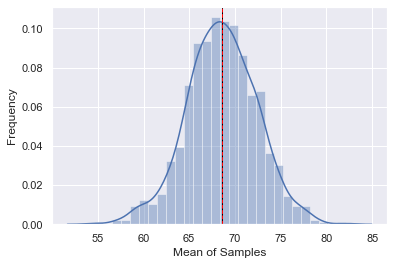

In [51]:
visual_sample_mean(68.57490118577078, sample_mean_list)

##### [BONUS] 2.B Visualize Distribution of Sample Mean 

In [59]:
# ANSWER
print('sample mean of age : '+str(np.mean(sample_mean_list)))
print(np.std(sample_mean_list))
print(np.std(sample_mean_list)/np.sqrt(len(sample_mean_list)))
print('population mean of age : '+str(np.mean(data["AGE"])))

sample mean of age : 68.54760800000001
3.811467419031153
0.12052918271661846
population mean of age : 68.57490118577078


##### [BONUS] 2.C Visualize Distribution of Sample Mean and Population together

C:\Users\apple\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


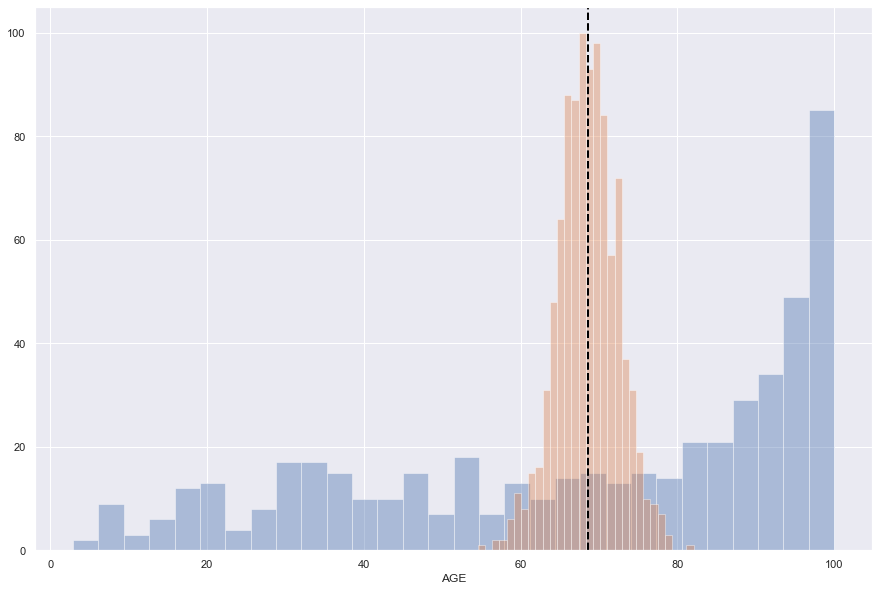

In [60]:
# ANSWER
Fig,ax = plt.subplots(figsize=(15,10))
ax =sns.distplot(Age, bins=30,kde=False)
sns.distplot(sample_mean_list,bins=30,kde=False,ax=ax)
ax.axvline(AGE_mean,linewidth=2,ls="dashed",c="black")
plt.show()

#### Diabetics Data

A medical doctor wants to reduce blood sugar level of all his patients by altering their diet. He finds that the mean sugar level of all patients is 180 with a standard deviation of 18. Nine of his patients start dieting and the mean of that sample is 175. The doctor specifies a 99% confidence interval.

##### 4. What is the standard error of the mean? 

In [61]:
# ANSWER
pop_mean=180 #population mean
Xsdev =18  #popluation standard deviation

sample_mean=175 #sample mean
sample_n=9    #sample size

Xsem =Xsdev /math.sqrt(sample_n)#calculate standard error
Xsem





6.0

##### 5. If all patients start dieting, what is the probability that their collective mean will be 175 or less?
(Hint: When you have multiple samples and want to describe the standard deviation of those sample means (the standard error), you would use this z score formula:
```
z = (x – μ) / (σ / √n)
```
This z-score will tell you how many standard errors there are between the sample mean and the population mean.

Treat 180 as the population mean, and use the `norm.cdf` function from `scipy.stats`.)

In [72]:
#ANSWER
# z = (sample mean - population mean) / Xsem
z=(175-180)/Xsem
print(z)
p=stats.norm.cdf(z)
print(p)

-0.8333333333333334
0.20232838096364308


##### 6. Can the doctor conclude that dieting will reduce blood sugar by 5 points on average?

In [73]:
#ANSWER
if (1 - p) >= 0.99:
    print("Dieting reduces blood sugar at a 99% confident interval.")
else:
    print("Dieting does not reduces blood sugar at a 99% confident interval.")
    

Dieting does not reduces blood sugar at a 99% confident interval.


##### 7. What should the doctor try next? Make some suitable assumptions and try to prove your idea with a calculation.

In [74]:
# ANSWER
# increase the number of patients in the diet study!
n=100
p=stats.norm.cdf((175-180)/(Xsdev/math.sqrt(n)))
print(p)
if (1-p)>=0.99:
    print('For a smaple size of', n, "patients,dieting will reduce blood sugar at a 99% confident interval.")
else:
    print('For a smaple size of', n, "patients,dieting does not reduce blood sugar at a 99% confident interval." )

0.0027366017862441435
For a smaple size of 100 patients,dieting will reduce blood sugar at a 99% confident interval.


References
---

[Z-Score: Definition, Formula and Calculation](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/z-score/)

[Confidence Intervals](https://www.mathsisfun.com/data/confidence-interval.html)



> 
>
>






---



---



> > > > > > > > > © 2019 Institute of Data


---



---



